### PCA 와인

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# 와인 데이터셋 불러오기
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
wine = load_wine()
wine_std = StandardScaler().fit_transform(wine.data)

In [36]:
wine.data.shape

(178, 13)

### 차원 축소
 - 13 차원(13개 컬럼) --> 2, 4, 6차원 

In [37]:
# 2차원
from sklearn.decomposition import PCA
pca2 = PCA(2)
wine_pca2 = pca2.fit_transform(wine.data)
wine_pca2[:3]

array([[318.56297929,  21.49213073],
       [303.09741966,  -5.36471768],
       [438.06113292,  -6.53730945]])

In [38]:
pca2.explained_variance_ratio_

array([0.99809123, 0.00173592])

In [39]:
pca2.explained_variance_ratio_, pca2.explained_variance_ratio_.sum()

(array([0.99809123, 0.00173592]), 0.9998271461166032)

In [40]:
# 4차원
from sklearn.decomposition import PCA
pca4 = PCA(4)
wine_pca4 = pca4.fit_transform(wine.data)
wine_pca4[:3]

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00,
        -2.50113758e-01],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00,
        -8.64034749e-01],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00,
         9.12410681e-01]])

In [41]:
pca4.explained_variance_ratio_, pca4.explained_variance_ratio_.sum()

(array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05]),
 0.9999723224303368)

In [42]:
# 6차원
from sklearn.decomposition import PCA
pca6 = PCA(6)
wine_pca6 = pca6.fit_transform(wine.data)
wine_pca6[:3]

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00,
        -2.50113758e-01,  6.77078222e-01,  5.68081040e-01],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00,
        -8.64034749e-01, -4.86095978e-01,  1.43398712e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00,
         9.12410681e-01,  3.80651426e-01,  6.72403748e-01]])

In [43]:
pca6.explained_variance_ratio_, pca6.explained_variance_ratio_.sum()

(array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
        1.23636847e-05, 8.46213034e-06]), 0.99999314824536)

### 2. PCA 전후 비교

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [45]:
# 원본 데이터셋
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, stratify = wine.target, random_state=2022 )

rfc = RandomForestClassifier(random_state=2022)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

1.0

In [46]:
# 2차원으로 데이터로 축소
X_train, X_test, y_train, y_test = train_test_split(wine_pca2, wine.target, stratify = wine.target, random_state=2022 )

rfc2 = RandomForestClassifier(random_state=2022)
rfc2.fit(X_train, y_train)
rfc2.score(X_test, y_test)

0.7333333333333333

In [47]:
# 4차원으로 데이터로 축소
X_train, X_test, y_train, y_test = train_test_split(wine_pca4, wine.target, stratify = wine.target, random_state=2022 )

rfc4 = RandomForestClassifier(random_state=2022)
rfc4.fit(X_train, y_train)
rfc4.score(X_test, y_test)

0.9555555555555556

In [48]:
# 6차원으로 데이터로 축소
X_train, X_test, y_train, y_test = train_test_split(wine_pca6, wine.target, stratify = wine.target, random_state=2022 )

rfc6 = RandomForestClassifier(random_state=2022)
rfc6.fit(X_train, y_train)
rfc6.score(X_test, y_test)

1.0

### 3. 시각화

In [49]:
df = pd.DataFrame(wine_pca2, columns=['PC1', 'PC2'])
df['target'] = wine.target
df.head()

,PC1,PC2,target
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,0


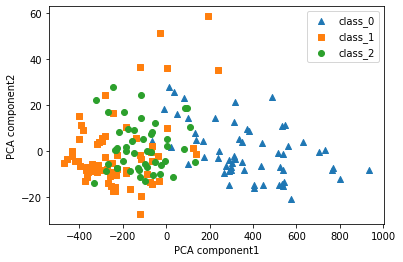

In [50]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x_data = df[df.target == i]['PC1']
  y_data = df[df.target == i]['PC2']
  plt.scatter(x_data, y_data, marker = marker, label = wine.target_names[i])

plt.legend()
plt.xlabel('PCA component1'), plt.ylabel('PCA component2')
plt.show() 

### 4. Code Refactoring

In [51]:
def pca_accuracy(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=2022 )

  rfc = RandomForestClassifier(random_state=2022)
  rfc.fit(X_train, y_train)
  score = rfc.score(X_test, y_test)
  return score

In [52]:
for n in [2,4,6]:
  pca = PCA(n_components=n)
  wine_pca = pca.fit_transform(wine_std)
  explained = pca.explained_variance_ratio_.sum()
  acc = pca_accuracy(wine_pca, wine.target)
  print(f'PCA{n}: 설명력-{explained: .4f}, 정확도-{acc: .4f}')

PCA2: 설명력- 0.5541, 정확도- 1.0000
PCA4: 설명력- 0.7360, 정확도- 1.0000
PCA6: 설명력- 0.8510, 정확도- 1.0000
